In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston["Target"]= df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X = boston.drop("Target",axis= 1)
Y = boston["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15 , random_state=2)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((430, 13), (76, 13), (430,), (76,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [14]:
y_train_predict = model.predict(X_train)
rmse_train_data = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The root mean square error for training set is {} ".format(rmse_train_data))
print("\n")

y_test_predict = model.predict(X_test)
rmse_test_data = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The root mean square error for training set is {} ".format(rmse_test_data))
print("\n")

The root mean square error for training set is 4.744150933201674 


The root mean square error for training set is 4.401577146808873 




Text(0, 0.5, 'Predicted')

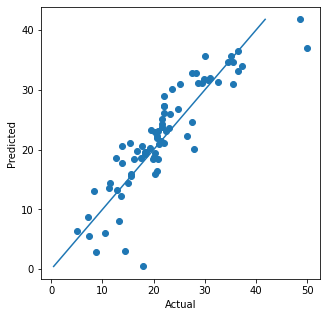

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel("Actual")
plt.ylabel('Predicted')